# Fake News Detection Using Machine Learning

- Group Members:
  <ol>
      <li> Dishesh Singh Chaudhary : 200001022
      <li> Rishabh Sharma : 200001067
      <li> Rishi Parsai : 200001068
  </ol>
<br>
- Dataset Source-Kaggle, Based on 2017 USA Presidential Elections, Popular dataset in this domain
    https://www.kaggle.com/c/fake-news/data
<br>
<br>
- Following steps are performed in order during this project
  <ol>
    <li> Analyzing the Dataset
    <li> Pre Processing the Dataset
    <li> Feature Extraction Using CountVectorizer and Tfidf vectorizer
    <li> Modeling Stage 1 using Test/Train Split
    <li> Building Pipelines for all the algorithms (7 algorithm used)
    <li> Modeling Stage 2 using K fold Cross validation 
    <li> Comparision of the Algorithms using F1 Scores and Mean Accuracies
    <li> Analysis of Different Confusion Matrces Obtained
  </ol>

# 1. Analyzing the Dataset. 

In [ ]:
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
%matplotlib inline

import os
import re
import nltk
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd #data processing

In [ ]:
#Reading the csv file using pandas and puting it into 'train' dataframe
train = pd.read_csv('./fake-news/train.csv')

In [3]:
print(train.shape)

(20800, 5)


In [4]:
#calculating number of null values in each column
print(train.isnull().sum())
print('************')

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************


In [5]:
#filling the null values using an empty character
train=train.fillna(' ')
train['total']=train['title']+' '+train['author']+' '+train['text']
train.head(10)

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,Life: Life Of Luxury: Elton John’s 6 Favorite ...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,Excerpts From a Draft Script for Donald Trump’...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co..."


<AxesSubplot:xlabel='label', ylabel='count'>

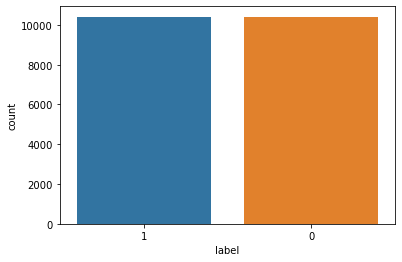

In [6]:
#visualising the class distribution in the dataset
sns.countplot(data=train,
              x='label',
              order=train['label'].value_counts().index)

# 2. Cleaning and preprocessing 

- Regex 
- Tokenization 
- StopWords
- Lemmatization
- Application

## 2.1 Regex

In [7]:
#Remove punctuations from the String  
s = "!</> hello please$$ </>^s!!!u%%bs&&%$cri@@@be^^^&&!& </>*to@# the&&\ cha@@@n##%^^&nel!@# %%$"

s = re.sub(r'[^\w\s]','',s)

print(s)

 hello please subscribe to the channel 


## 2.2 Tokenization

In [8]:
#Downloading nltk data
nltk.download('punkt')

nltk.word_tokenize("Hello how are you")

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['Hello', 'how', 'are', 'you']

## 2.3 StopWords

In [9]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
sentence = "Covid-19 pandemic has impacted many countries and what it did to economy is very stressful"

In [11]:
words = nltk.word_tokenize(sentence)
words = [w for w in words if w not in stop_words]

words

['Covid-19',
 'pandemic',
 'impacted',
 'many',
 'countries',
 'economy',
 'stressful']

## 2.4 Lemmatization

In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')

input_str="been had done languages cities mice"

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [13]:
#Tokenize the sentence
input_str=nltk.word_tokenize(input_str)

#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

been
had
done
language
city
mouse


## 2.5 Let's Apply

In [14]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    words = nltk.word_tokenize(sentence) #tokenization
    words = [w for w in words if not w in stop_words]  #stopwords removal
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
    train.loc[index,'total'] = filter_sentence

In [15]:
train = train[['total','label']]
print(train.shape)
print(train)

(20800, 2)
                                                   total  label
0       house dem aide we didnt even see comeys lette...      1
1       flynn hillary clinton big woman campus breitb...      0
2       why truth might get you fired consortiumnewsc...      1
3       15 civilians killed in single us airstrike ha...      1
4       iranian woman jailed fictional unpublished st...      1
...                                                  ...    ...
20795   rapper ti trump poster child for white suprem...      0
20796   nfl playoffs schedule matchups odds the new y...      0
20797   macys is said receive takeover approach hudso...      0
20798   nato russia to hold parallel exercises in bal...      1
20799   what keeps f35 alive david swanson david swan...      1

[20800 rows x 2 columns]


# 3. Feature Extraction Using NLP 
 - CountVectorizer
 - Tfidf Vectorizer
 - Application

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
X_train = train['total']
Y_train_main = train['label']

## 3.1 Bag-of-words / CountVectorizer

In [18]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [19]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## 3.2 TF-iDF Vectorizer

In [20]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [21]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)

In [22]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

## 3.3 Let's Apply

In [23]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer(max_features = 5000)
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [24]:
print(tf_idf_matrix.shape)
tf_idf_matrix

(20800, 5000)


<20800x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 4504974 stored elements in Compressed Sparse Row format>

# 4. Modelling Stage 1

## 4.1 Splitting dataset into Train and Test

In [25]:
#splitting in samples
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(tf_idf_matrix, Y_train_main, test_size=0.40, random_state=0)

## 4.2 Building Custom function for Displaying Confusion Matrix

In [26]:
#Custom function to plot confusion matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 4.3 Logistic Regression

Accuracy of LR classifier on training set: 0.98

Different Scores for the Model on Test Dataset: 

Accuracy Score: 0.96
Precision Score: 0.962
Recal Score: 0.964
F1 Score: 0.963


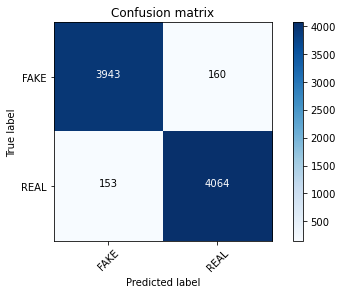

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 200)
logreg.fit(X_train, Y_train)
lr_pred = logreg.predict(X_test)
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(logreg.score(X_train, Y_train)))
print('\nDifferent Scores for the Model on Test Dataset: \n')
print('Accuracy Score: {:.2f}'
     .format(logreg.score(X_test, Y_test)))
print('Precision Score: %.3f' % precision_score(Y_test, lr_pred))
print('Recal Score: %.3f' % recall_score(Y_test, lr_pred))
print('F1 Score: %.3f' % f1_score(Y_test, lr_pred))
lcm = confusion_matrix(Y_test, lr_pred)

plot_confusion_matrix(lcm, classes=['FAKE', 'REAL'])

## 4.4 MultinomialNB

Accuracy of NB  classifier on training set: 0.92

Different Scores for the Model on Test Dataset: 

Accuracy Score: 0.90
Precision Score: 0.939
Recal Score: 0.864
F1 Score: 0.900


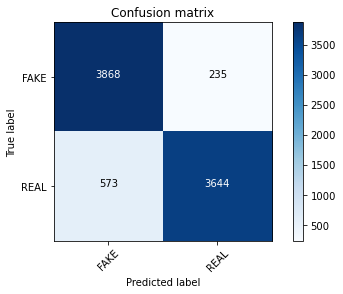

In [28]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, Y_train)
nb_pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, Y_train)))
print('\nDifferent Scores for the Model on Test Dataset: \n')
print('Accuracy Score: {:.2f}'
     .format(NB.score(X_test, Y_test)))
print('Precision Score: %.3f' % precision_score(Y_test, nb_pred))
print('Recal Score: %.3f' % recall_score(Y_test, nb_pred))
print('F1 Score: %.3f' % f1_score(Y_test, nb_pred))
nbcm = confusion_matrix(Y_test, nb_pred)
nbcm

plot_confusion_matrix(nbcm, classes=['FAKE', 'REAL'])

## 4.5 Random Forest

Accuracy of RF  classifier on training set: 1.00

Different Scores for the Model on Test Dataset: 

Accuracy Score: 0.97
Precision Score: 0.973
Recal Score: 0.963
F1 Score: 0.968


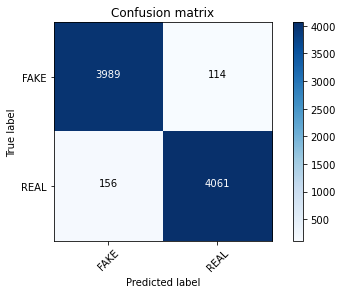

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 60, max_depth = 76)  
RF.fit(X_train, Y_train)
rf_pred = RF.predict(X_test)
print('Accuracy of RF  classifier on training set: {:.2f}'
     .format(RF.score(X_train, Y_train)))
print('\nDifferent Scores for the Model on Test Dataset: \n')
print('Accuracy Score: {:.2f}'
     .format(RF.score(X_test, Y_test)))
print('Precision Score: %.3f' % precision_score(Y_test, rf_pred))
print('Recal Score: %.3f' % recall_score(Y_test, rf_pred))
print('F1 Score: %.3f' % f1_score(Y_test, rf_pred))
rfcm = confusion_matrix(Y_test, rf_pred)

plot_confusion_matrix(rfcm, classes=['FAKE', 'REAL'])

## 4.6 SGD

Accuracy of SGD  classifier on training set: 0.99

Different Scores for the Model on Test Dataset: 

Accuracy Score: 0.97
Precision Score: 0.972
Recal Score: 0.968
F1 Score: 0.970


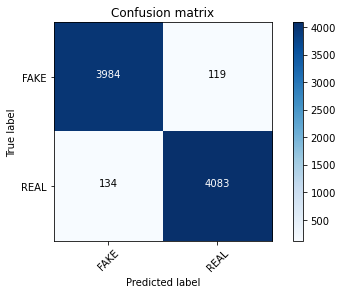

In [30]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="hinge", max_iter=100)  
sgd.fit(X_train, Y_train)
sgd_pred = sgd.predict(X_test)
print('Accuracy of SGD  classifier on training set: {:.2f}'
     .format(sgd.score(X_train, Y_train)))
print('\nDifferent Scores for the Model on Test Dataset: \n')
print('Accuracy Score: {:.2f}'
     .format(sgd.score(X_test, Y_test)))
print('Precision Score: %.3f' % precision_score(Y_test, sgd_pred))
print('Recal Score: %.3f' % recall_score(Y_test, sgd_pred))
print('F1 Score: %.3f' % f1_score(Y_test, sgd_pred))
scm = confusion_matrix(Y_test, sgd_pred)

plot_confusion_matrix(scm, classes=['FAKE', 'REAL'])

## 4.7 Passive Aggresive Classifier

Accuracy of PA classifier on training set: 1.00

Different Scores for the Model on Test Dataset: 

Accuracy Score: 0.96
Precision Score: 0.959
Recal Score: 0.962
F1 Score: 0.960


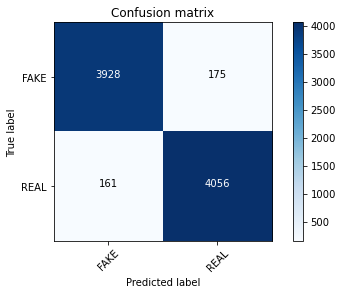

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier

ppa = PassiveAggressiveClassifier(C=1)
ppa.fit(X_train, Y_train)
ppa_pred = ppa.predict(X_test)
print('Accuracy of PA classifier on training set: {:.2f}'
     .format(ppa.score(X_train, Y_train)))
print('\nDifferent Scores for the Model on Test Dataset: \n')
print('Accuracy Score: {:.2f}'
     .format(ppa.score(X_test, Y_test)))
print('Precision Score: %.3f' % precision_score(Y_test, ppa_pred))
print('Recal Score: %.3f' % recall_score(Y_test, ppa_pred))
print('F1 Score: %.3f' % f1_score(Y_test, ppa_pred))
pacm = confusion_matrix(Y_test, ppa_pred)

plot_confusion_matrix(pacm, classes=['FAKE', 'REAL'])

# 5. Building Pipelines for algorithms

In [32]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train['total'], train['label'], test_size=0.40, random_state=0)

In [33]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [34]:
plr = Pipeline([
    ('plrc', CountVectorizer(max_features = 5000)),
    ('plrt', TfidfTransformer(norm='l2')),
    ('plrclf',  linear_model.LogisticRegression(max_iter=500))
])

pnb = Pipeline([
    ('pnbc', CountVectorizer(max_features = 5000)),
    ('pnbt', TfidfTransformer(norm='l2')),
    ('pnbclf',  MultinomialNB())
])

prf = Pipeline([
    ('prfc', CountVectorizer(max_features = 5000)),
    ('prft', TfidfTransformer(norm='l2')),
    ('prfclf', RandomForestClassifier(n_estimators = 60) )
])

psg = Pipeline([
    ('psgc', CountVectorizer(max_features = 5000)),
    ('psgt', TfidfTransformer(norm='l2')),
    ('psgclf', SGDClassifier(loss="hinge", max_iter=100)  )
])

ppa = Pipeline([
    ('ppac', CountVectorizer(max_features = 5000)),
    ('ppat', TfidfTransformer(norm='l2')),
    ('ppaclf', PassiveAggressiveClassifier(C=0.5))
])

##Creating copies of original pipelines so that we have atleast one copy of each pipeline whihc is not trained or modified
plr1 = plr
pnb1 = pnb
prf1 = prf
psg1 = psg
ppa1 = ppa

plr2 = plr
pnb2 = pnb
prf2 = prf
psg2 = psg
ppa2 = ppa

## 5.2 Training the pipelines 

In [35]:
f1 = plr1.fit(X_train, Y_train)
f2 = pnb1.fit(X_train, Y_train)
f3 = prf1.fit(X_train, Y_train)
f4 = psg1.fit(X_train, Y_train)
f5 = ppa1.fit(X_train, Y_train)

In [36]:
#saving the pipeline
filename1 = 'plr1.sav'
joblib.dump(plr1, filename1)

filename2 = 'pnb1.sav'
joblib.dump(pnb1, filename2)

filename3 = 'prf1.sav'
joblib.dump(prf1, filename3)

filename4 = 'psg1.sav'
joblib.dump(psg1, filename4)

filename5 = 'ppa1.sav'
joblib.dump(ppa1, filename5)


['ppa1.sav']

## 5.3 Checking the pipelines are Working using Train/Test split

In [37]:
## using pipelines for predictions
import warnings
warnings.filterwarnings("ignore")

loaded_model = joblib.load('plr.sav')
plr_pred = loaded_model.predict(X_test)
plr_result = np.mean(plr_pred == Y_test)

loaded_model = joblib.load('pnb.sav')
pnb_pred = loaded_model.predict(X_test)
pnb_result = np.mean(pnb_pred == Y_test)

loaded_model = joblib.load('prf.sav')
prf_pred = loaded_model.predict(X_test)
prf_result = np.mean(prf_pred == Y_test)

loaded_model = joblib.load('psg.sav')
psg_pred = loaded_model.predict(X_test)
psg_result = np.mean(psg_pred == Y_test)

loaded_model = joblib.load('ppa.sav')
ppa_pred = loaded_model.predict(X_test)
ppa_result = np.mean(ppa_pred == Y_test)

print(plr_result)
print(pnb_result)
print(prf_result)
print(psg_result)
print(ppa_result)

0.9608173076923077
0.9153846153846154
0.9456730769230769
0.9746394230769231
0.9731971153846154


# 5.4 Pipelines for Ensemble Methods

## 5.4.1 Voting Classifier

In [38]:
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

model_1 = LogisticRegression(max_iter=200)
model_2 = XGBClassifier()
model_3 = PassiveAggressiveClassifier(C=0.5)

vc = VotingClassifier(
    estimators=[('mlr', model_1), ('mxgb', model_2), ('mpa', model_3)], voting='hard')

pvc = Pipeline([
    ('prfc', CountVectorizer(max_features = 5000)),
    ('prft', TfidfTransformer(norm='l2')),
    ('prfclf', vc)
])

#creating copy
pvc1 = pvc

In [39]:
#training and building the pipeline
f6 = pvc1.fit(X_train, Y_train)
filename6 = 'pvc1.sav'
joblib.dump(pvc1, filename6)

['pvc1.sav']

In [40]:
#loading the pipeline
loaded_model = joblib.load('pvc1.sav')
pvc_pred = loaded_model.predict(X_test)
pvc_result = np.mean(pvc_pred == Y_test)
pvc_result

0.973798076923077

## 5.4.2 Stacking Classifier

In [41]:
# importing stacking lib
from mlxtend.classifier import StackingClassifier
 
# Splitting between train data into training and validation dataset
X_train, X_test, y_train, y_test = train_test_split(
    train['total'], train['label'], test_size=0.20)
 
# putting all base model objects in one list

model_1 = RandomForestClassifier(n_estimators = 60)
model_2 = PassiveAggressiveClassifier(C=0.5)

all_models = [model_1, model_2]
 
# computing the stack features
stc = StackingClassifier(classifiers=all_models, meta_classifier = SGDClassifier(loss="hinge", max_iter= 200)) 

pst = Pipeline([
    ('prfc', CountVectorizer(max_features = 5000)),
    ('prft', TfidfTransformer(norm='l2')),
    ('prfclf', stc)
])

pst1 = pst

In [42]:
f7 = pst1.fit(X_train, y_train)
filename7 = 'pst1.sav'
joblib.dump(pst1, filename7)

['pst1.sav']

In [43]:
# #training the model
loaded_model = joblib.load('pst1.sav')
pst_pred = loaded_model.predict(X_test)

# # printing the mean error between real value and predicted value
pst_result = np.mean(pst_pred == y_test)
pst_result

0.9721153846153846

# 6. K Fold Cross Validation and Model Comparision

In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [45]:
def kFoldCV(classifier):
    k_fold = KFold(n_splits=5)
    scoref1S = []
    scorePreS = []
    scoreRecS = []
    scoreAccS = []
    
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train):
        train_text = train.iloc[train_ind]['total'] 
        train_y = train.iloc[train_ind]['label']
    
        test_text = train.iloc[test_ind]['total']
        test_y = train.iloc[test_ind]['label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        scoref1 = f1_score(test_y,predictions)
        scorePre = precision_score(test_y, predictions)
        scoreRec = recall_score(test_y, predictions)
        scoreAcc = accuracy_score(test_y, predictions)
        
        scoref1S.append(scoref1)
        scorePreS.append(scorePre)
        scoreRecS.append(scoreAcc)
        scoreAccS.append(scoreAcc)
    
    f1 = sum(scoref1S)/len(scoref1S)
    rec = sum(scorePreS)/len(scorePreS)
    pre = sum(scoreRecS)/len(scoreRecS)
    acc = sum(scoreAccS)/len(scoreAccS)
    return [f1, rec, pre, acc, confusion]

# 7. Comparing the models  using diff. scores

In [46]:
#K-fold cross validation for all classifiers
kflr = kFoldCV(plr)

In [47]:
kfnb = kFoldCV(pnb)

In [53]:
kfrf = kFoldCV(prf)

In [49]:
kfsg = kFoldCV(psg)

In [50]:
kfpa = kFoldCV(ppa)

In [51]:
kfvc = kFoldCV(pvc)

In [52]:
kfst = kFoldCV(pst)

In [54]:
#printing accuracies for chechking
print(kflr[3])
print(kfnb[3])
print(kfrf[3])
print(kfsg[3])
print(kfpa[3])
print(kfvc[3])
print(kfst[3])

0.9643749999999999
0.90625
0.9731249999999999
0.9694230769230769
0.9640384615384615
0.9766826923076923
0.9725961538461538


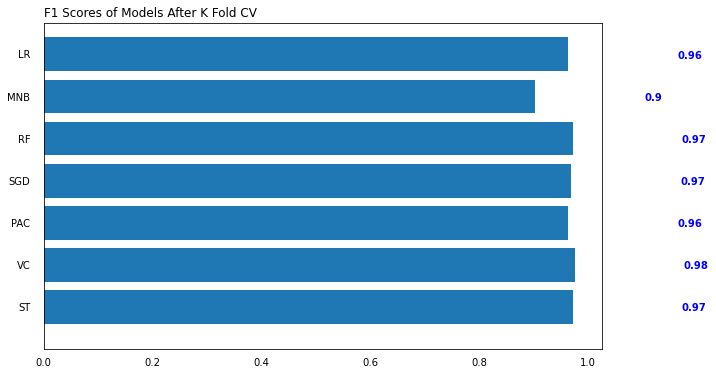

In [61]:
# creating the dataset
f1_ss = {'LR': kflr[0], 'MNB': kfnb[0], 'RF':kfrf[0],
        'SGD': kfsg[0], 'PAC':kfpa[0], 'VC':kfvc[0], 'ST': kfst[0]}
algos = list(f1_ss.keys())
scos = list(f1_ss.values())
  
# Figure Size
fig, ax = plt.subplots(figsize=(10, 6))
 
# Horizontal Bar Plot
ax.barh(algos, scos)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
 
# # Add x, y gridlines
# ax.grid(b=True, color='green',
#         linestyle='-.', linewidth=0.5,
#         alpha=0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='blue')

ax.set_title('F1 Scores of Models After K Fold CV',
             loc='left', )
    

plt.ylim(7)
plt.show()

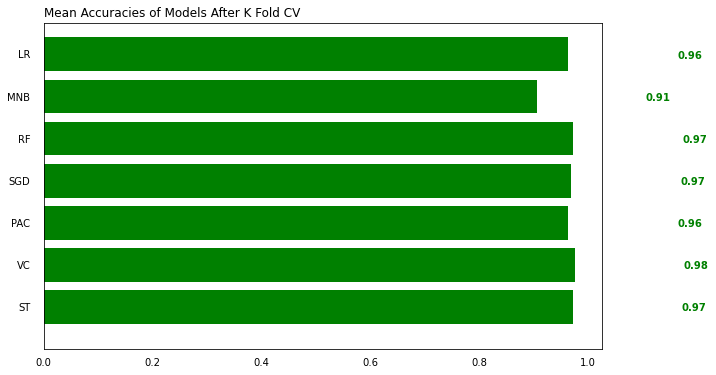

In [65]:
# creating the dataset
f1_ss = {'LR': kflr[3], 'MNB': kfnb[3], 'RF':kfrf[3],
        'SGD': kfsg[3], 'PAC':kfpa[3], 'VC':kfvc[3], 'ST': kfst[3]}
algos = list(f1_ss.keys())
scos = list(f1_ss.values())
  
# Figure Size
fig, ax = plt.subplots(figsize=(10, 6))
 
# Horizontal Bar Plot
ax.barh(algos, scos, color = 'green')

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
 
# # Add x, y gridlines
# ax.grid(b=True, color='green',
#         linestyle='-.', linewidth=0.5,
#         alpha=0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='green')

ax.set_title('Mean Accuracies of Models After K Fold CV',
             loc='left', )
    

plt.ylim(7)
plt.show()

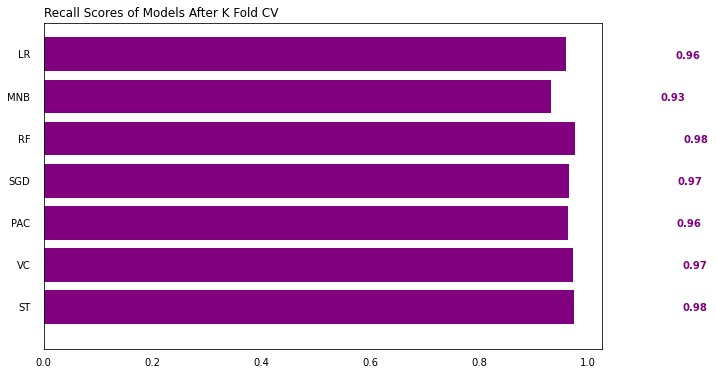

In [66]:
# creating the dataset
f1_ss = {'LR': kflr[1], 'MNB': kfnb[1], 'RF':kfrf[1],
        'SGD': kfsg[1], 'PAC':kfpa[1], 'VC':kfvc[1], 'ST': kfst[1]}
algos = list(f1_ss.keys())
scos = list(f1_ss.values())
  
# Figure Size
fig, ax = plt.subplots(figsize=(10, 6))
 
# Horizontal Bar Plot
ax.barh(algos, scos, color = 'purple')

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
 
# # Add x, y gridlines
# ax.grid(b=True, color='green',
#         linestyle='-.', linewidth=0.5,
#         alpha=0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='purple')

ax.set_title('Recall Scores of Models After K Fold CV',
             loc='left', )
    

plt.ylim(7)
plt.show()

# 8 Analyzing Confusion Matrix for Different Models

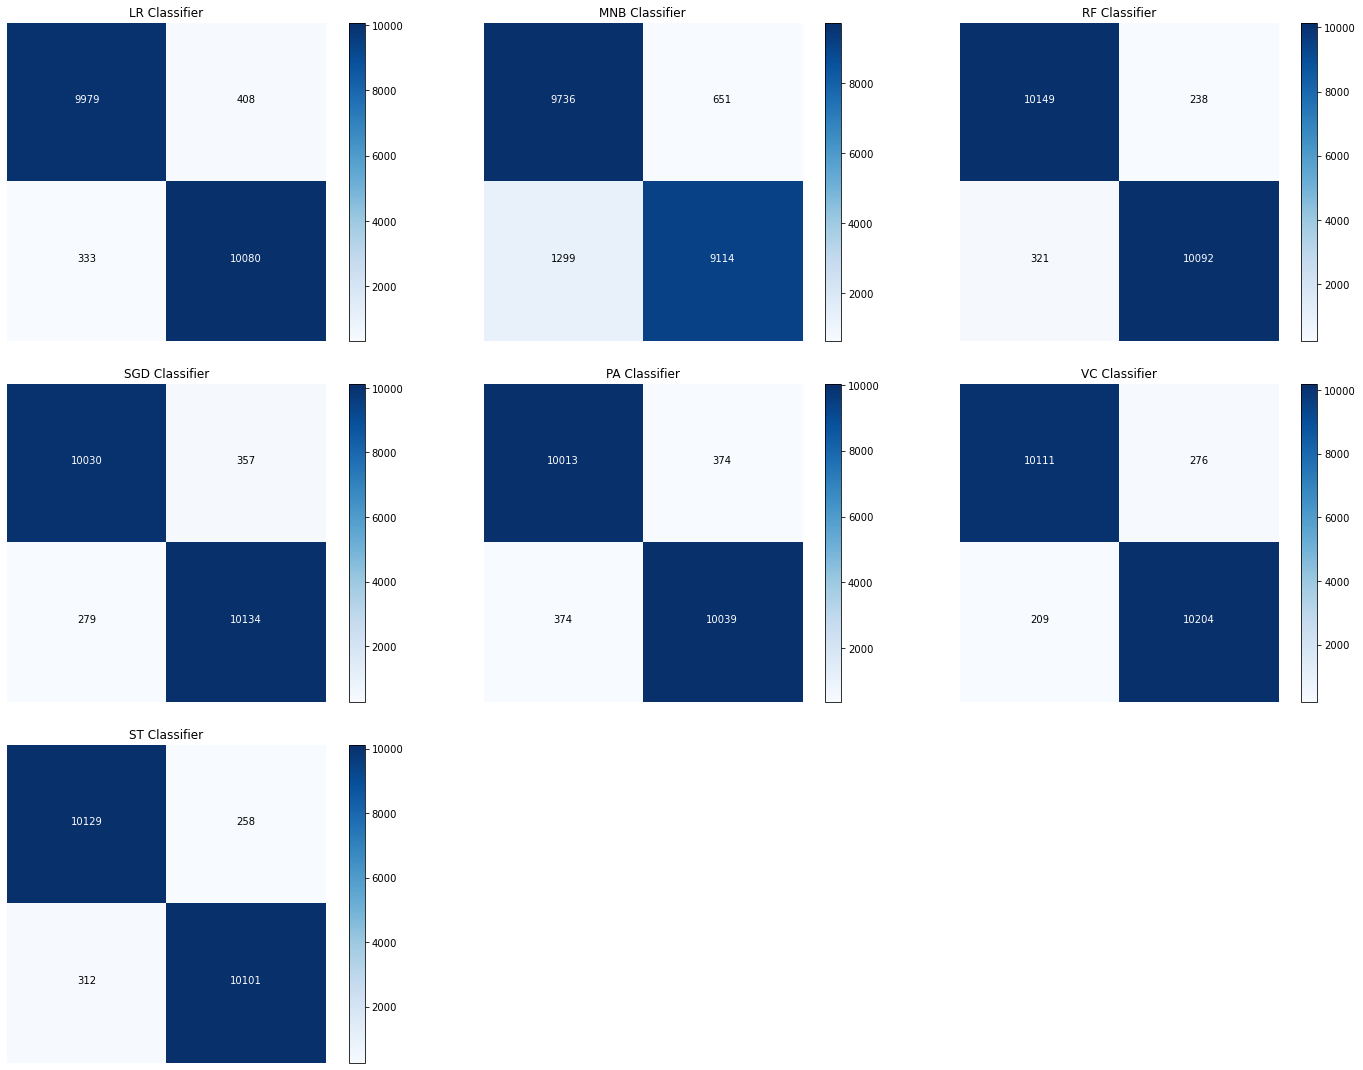

In [62]:
fig = plt.figure(figsize=(20, 25))
# setting values to rows and column variables
rows = 5
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plot_confusion_matrix(kflr[4], classes=['FAKE', 'REAL'])
plt.axis('off')
plt.title("LR Classifier")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plot_confusion_matrix(kfnb[4], classes=['FAKE', 'REAL'])
plt.axis('off')
plt.title("MNB Classifier")

fig.add_subplot(rows, columns, 3)
  
# showing image
plot_confusion_matrix(kfrf[4], classes=['FAKE', 'REAL'])
plt.axis('off')
plt.title("RF Classifier")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 4)
  
# showing image
plot_confusion_matrix(kfsg[4], classes=['FAKE', 'REAL'])
plt.axis('off')
plt.title("SGD Classifier")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 5)
  
# showing image
plot_confusion_matrix(kfpa[4], classes=['FAKE', 'REAL'])
plt.axis('off')
plt.title("PA Classifier")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 6)
  
# showing image
plot_confusion_matrix(kfvc[4], classes=['FAKE', 'REAL'])
plt.axis('off')
plt.title("VC Classifier")

#  Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 7)
  
#  showing image
plot_confusion_matrix(kfst[4], classes=['FAKE', 'REAL'])
plt.axis('off')
plt.title("ST Classifier")

print('\n')